In [1]:
import visualize
import gdxray
import transforms as T
import torchvision
import torch

In [2]:
import utils

In [3]:
dataset = gdxray.CroppedGdxrayDataset('cropped_castings_128_256')

In [48]:
dataset.load_boxes(['C0001', 'C0002'])

In [49]:
image, target = dataset[5]

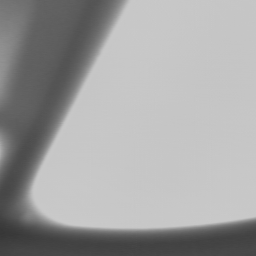

In [50]:
image

In [53]:
target['boxes']

tensor([[ 15., 208.,  41., 233.]])

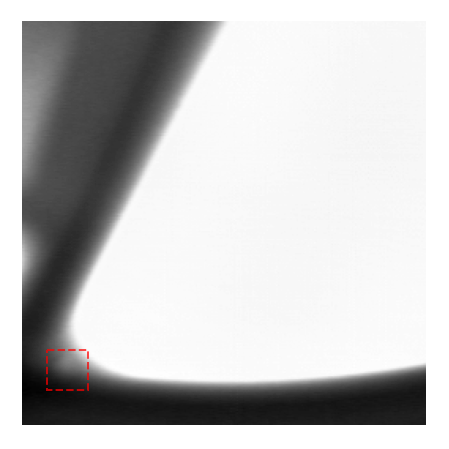

<AxesSubplot:>

In [54]:
visualize.display_instances(image, target['boxes'], figsize=(8, 8))

In [3]:
def get_transform(train):
    transforms = []
    # converts the image, a PIL image, into a PyTorch Tensor
    transforms.append(T.ToTensor())
    if train:
        # during training, randomly flip the training images
        # and ground-truth for data augmentation
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

In [10]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /home/ubuntu/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [11]:
dataset = gdxray.CroppedGdxrayDataset('cropped_castings_128_256', get_transform(train=True))

In [12]:
dataset.load_boxes(['C0001', 'C0002'])

In [13]:
img, target = dataset[0]

In [14]:
img

tensor([[[0.3686, 0.3647, 0.3647,  ..., 0.0784, 0.0784, 0.0824],
         [0.3725, 0.3725, 0.3725,  ..., 0.0824, 0.0824, 0.0784],
         [0.3686, 0.3647, 0.3647,  ..., 0.0784, 0.0824, 0.0824],
         ...,
         [0.2667, 0.2706, 0.2745,  ..., 0.0588, 0.0627, 0.0588],
         [0.2667, 0.2667, 0.2627,  ..., 0.0627, 0.0627, 0.0627],
         [0.2706, 0.2667, 0.2667,  ..., 0.0549, 0.0588, 0.0627]]])

In [15]:
target

{'boxes': tensor([[ 58., 185.,  85., 207.]]), 'labels': tensor([1])}

In [19]:
data_loader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True, collate_fn=utils.collate_fn
)

# For training

In [10]:
images,targets = next(iter(data_loader))

In [11]:
images

(tensor([[[0.7882, 0.7882, 0.7843,  ..., 0.2824, 0.2824, 0.2824],
          [0.7882, 0.7882, 0.7882,  ..., 0.2784, 0.2784, 0.2784],
          [0.7843, 0.7882, 0.7882,  ..., 0.2745, 0.2784, 0.2824],
          ...,
          [0.3765, 0.3725, 0.3765,  ..., 0.7686, 0.7686, 0.7686],
          [0.3804, 0.3765, 0.3765,  ..., 0.7725, 0.7725, 0.7725],
          [0.3765, 0.3765, 0.3765,  ..., 0.7686, 0.7686, 0.7725]]]),
 tensor([[[0.7725, 0.7725, 0.7725,  ..., 0.3765, 0.3765, 0.3725],
          [0.7725, 0.7725, 0.7686,  ..., 0.3765, 0.3765, 0.3725],
          [0.7725, 0.7725, 0.7725,  ..., 0.3843, 0.3843, 0.3804],
          ...,
          [0.0784, 0.0784, 0.0784,  ..., 0.2549, 0.2510, 0.2510],
          [0.0784, 0.0784, 0.0745,  ..., 0.2627, 0.2627, 0.2588],
          [0.0824, 0.0784, 0.0784,  ..., 0.2627, 0.2627, 0.2549]]]))

In [13]:
images

[tensor([[[0.7882, 0.7882, 0.7843,  ..., 0.2824, 0.2824, 0.2824],
          [0.7882, 0.7882, 0.7882,  ..., 0.2784, 0.2784, 0.2784],
          [0.7843, 0.7882, 0.7882,  ..., 0.2745, 0.2784, 0.2824],
          ...,
          [0.3765, 0.3725, 0.3765,  ..., 0.7686, 0.7686, 0.7686],
          [0.3804, 0.3765, 0.3765,  ..., 0.7725, 0.7725, 0.7725],
          [0.3765, 0.3765, 0.3765,  ..., 0.7686, 0.7686, 0.7725]]]),
 tensor([[[0.7725, 0.7725, 0.7725,  ..., 0.3765, 0.3765, 0.3725],
          [0.7725, 0.7725, 0.7686,  ..., 0.3765, 0.3765, 0.3725],
          [0.7725, 0.7725, 0.7725,  ..., 0.3843, 0.3843, 0.3804],
          ...,
          [0.0784, 0.0784, 0.0784,  ..., 0.2549, 0.2510, 0.2510],
          [0.0784, 0.0784, 0.0745,  ..., 0.2627, 0.2627, 0.2588],
          [0.0824, 0.0784, 0.0784,  ..., 0.2627, 0.2627, 0.2549]]])]

In [14]:
targets

[{'boxes': tensor([[163.,  52., 198.,  83.],
          [174.,  87., 193., 104.]]), 'labels': tensor([1, 1])},
 {'boxes': tensor([[208., 112., 224., 130.]]), 'labels': tensor([1])}]

In [15]:
output = model(images,targets)

/usr/local/anaconda3/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [16]:
output

{'loss_classifier': tensor(0.0647, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0038, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.2317, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0044, grad_fn=<DivBackward0>)}

# For inference

In [17]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [18]:
prediction = model(images,targets)

In [19]:
prediction

[{'boxes': tensor([[1.2615e-01, 9.3340e+00, 7.5979e+01, 1.3700e+02],
          [8.2620e-01, 1.4191e+01, 7.4013e+01, 1.3962e+02],
          [7.7493e+01, 7.0147e-01, 1.8554e+02, 7.6644e+01],
          [7.2077e+01, 1.9660e+00, 1.8928e+02, 7.8750e+01],
          [7.6788e+01, 2.7181e+00, 1.8216e+02, 7.8351e+01]],
         grad_fn=<StackBackward0>),
  'labels': tensor([70, 74, 74, 77, 85]),
  'scores': tensor([0.4683, 0.3052, 0.1694, 0.0735, 0.0639], grad_fn=<IndexBackward0>)},
 {'boxes': tensor([[  3.6304,  37.7657, 243.4792, 224.3223],
          [  0.0000,   8.1691, 256.0000, 246.4250]], grad_fn=<StackBackward0>),
  'labels': tensor([17, 73]),
  'scores': tensor([0.1029, 0.0508], grad_fn=<IndexBackward0>)}]

In [21]:
targets

[{'boxes': tensor([[163.,  52., 198.,  83.],
          [174.,  87., 193., 104.]]), 'labels': tensor([1, 1])},
 {'boxes': tensor([[208., 112., 224., 130.]]), 'labels': tensor([1])}]

# Putting everything together

In [4]:
# use our dataset and defined transformations
dataset = gdxray.CroppedGdxrayDataset('cropped_castings_128_256', get_transform(train=True))
dataset_test = gdxray.CroppedGdxrayDataset('cropped_castings_128_256', get_transform(train=False))
dataset.load_boxes(['C0001', 'C0002'])
dataset_test.load_boxes(['C0001', 'C0002'])

In [5]:
# split the dataset in train and test set
torch.manual_seed(1)
indices = torch.randperm(len(dataset)).tolist()
dataset = torch.utils.data.Subset(dataset, indices[:-50])
dataset_test = torch.utils.data.Subset(dataset_test, indices[-50:])

In [6]:
# define training and validation data loaders
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=2, shuffle=True,
    collate_fn=utils.collate_fn)

data_loader_test = torch.utils.data.DataLoader(
    dataset_test, batch_size=1, shuffle=False,
    collate_fn=utils.collate_fn)

# An Instance model for PennFudan Dataset

In [7]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [8]:
def get_instance_model(num_classes):
    # load an instance segmentation model pre-trained on COCO
    #model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

Now let's instantiate the model and the optimizer

In [9]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# our dataset has two classes only - background and person
num_classes = 2

# get the model using our helper function
model = get_instance_model(num_classes)
# move model to the right device
model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.005,
                            momentum=0.9, weight_decay=0.0005)

# and a learning rate scheduler which decreases the learning rate by
# 10x every 3 epochs
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer,
                                               step_size=3,
                                               gamma=0.1)

And now let's train the model

In [10]:
from torch.optim.lr_scheduler import StepLR

In [11]:
from engine import train_one_epoch, evaluate_compute_batch_ap

In [13]:
import numpy as np

In [14]:
num_epochs =50

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    APs = evaluate_compute_batch_ap(model, data_loader_test, device=device)
    print("mAP @ IoU=50: ", np.mean(APs))

Epoch: [0]  [  0/184]  eta: 0:00:28  lr: 0.000032  loss: 0.2974 (0.2974)  loss_classifier: 0.1273 (0.1273)  loss_box_reg: 0.1487 (0.1487)  loss_objectness: 0.0191 (0.0191)  loss_rpn_box_reg: 0.0024 (0.0024)  time: 0.1532  data: 0.0044  max mem: 1887
Epoch: [0]  [ 10/184]  eta: 0:00:24  lr: 0.000305  loss: 0.2179 (0.1972)  loss_classifier: 0.0720 (0.0683)  loss_box_reg: 0.0910 (0.1162)  loss_objectness: 0.0045 (0.0098)  loss_rpn_box_reg: 0.0025 (0.0029)  time: 0.1405  data: 0.0036  max mem: 1887
Epoch: [0]  [ 20/184]  eta: 0:00:22  lr: 0.000578  loss: 0.1497 (0.1796)  loss_classifier: 0.0492 (0.0598)  loss_box_reg: 0.0871 (0.1071)  loss_objectness: 0.0036 (0.0094)  loss_rpn_box_reg: 0.0027 (0.0032)  time: 0.1390  data: 0.0035  max mem: 1887
Epoch: [0]  [ 30/184]  eta: 0:00:21  lr: 0.000851  loss: 0.1396 (0.1832)  loss_classifier: 0.0492 (0.0608)  loss_box_reg: 0.0914 (0.1109)  loss_objectness: 0.0030 (0.0083)  loss_rpn_box_reg: 0.0027 (0.0031)  time: 0.1389  data: 0.0036  max mem: 1887


Epoch: [1]  [120/184]  eta: 0:00:08  lr: 0.005000  loss: 0.2068 (0.2073)  loss_classifier: 0.0575 (0.0622)  loss_box_reg: 0.1290 (0.1375)  loss_objectness: 0.0019 (0.0046)  loss_rpn_box_reg: 0.0026 (0.0031)  time: 0.1389  data: 0.0035  max mem: 1887
Epoch: [1]  [130/184]  eta: 0:00:07  lr: 0.005000  loss: 0.1718 (0.2055)  loss_classifier: 0.0466 (0.0618)  loss_box_reg: 0.1226 (0.1361)  loss_objectness: 0.0018 (0.0047)  loss_rpn_box_reg: 0.0026 (0.0031)  time: 0.1390  data: 0.0035  max mem: 1887
Epoch: [1]  [140/184]  eta: 0:00:06  lr: 0.005000  loss: 0.1540 (0.2046)  loss_classifier: 0.0446 (0.0611)  loss_box_reg: 0.1017 (0.1358)  loss_objectness: 0.0021 (0.0046)  loss_rpn_box_reg: 0.0022 (0.0030)  time: 0.1387  data: 0.0035  max mem: 1887
Epoch: [1]  [150/184]  eta: 0:00:04  lr: 0.005000  loss: 0.1711 (0.2033)  loss_classifier: 0.0495 (0.0604)  loss_box_reg: 0.1009 (0.1354)  loss_objectness: 0.0023 (0.0045)  loss_rpn_box_reg: 0.0020 (0.0030)  time: 0.1386  data: 0.0036  max mem: 1887


Epoch: [3]  [ 20/184]  eta: 0:00:22  lr: 0.000500  loss: 0.1569 (0.1756)  loss_classifier: 0.0454 (0.0511)  loss_box_reg: 0.1076 (0.1206)  loss_objectness: 0.0008 (0.0014)  loss_rpn_box_reg: 0.0023 (0.0026)  time: 0.1387  data: 0.0036  max mem: 1887
Epoch: [3]  [ 30/184]  eta: 0:00:21  lr: 0.000500  loss: 0.1385 (0.1613)  loss_classifier: 0.0415 (0.0472)  loss_box_reg: 0.0932 (0.1108)  loss_objectness: 0.0006 (0.0012)  loss_rpn_box_reg: 0.0014 (0.0022)  time: 0.1387  data: 0.0036  max mem: 1887
Epoch: [3]  [ 40/184]  eta: 0:00:19  lr: 0.000500  loss: 0.1396 (0.1598)  loss_classifier: 0.0413 (0.0466)  loss_box_reg: 0.0932 (0.1098)  loss_objectness: 0.0007 (0.0013)  loss_rpn_box_reg: 0.0012 (0.0022)  time: 0.1388  data: 0.0036  max mem: 1887
Epoch: [3]  [ 50/184]  eta: 0:00:18  lr: 0.000500  loss: 0.1422 (0.1598)  loss_classifier: 0.0424 (0.0469)  loss_box_reg: 0.0990 (0.1095)  loss_objectness: 0.0007 (0.0012)  loss_rpn_box_reg: 0.0019 (0.0022)  time: 0.1391  data: 0.0036  max mem: 1887


Epoch: [4]  [140/184]  eta: 0:00:06  lr: 0.000500  loss: 0.1379 (0.1584)  loss_classifier: 0.0368 (0.0446)  loss_box_reg: 0.0999 (0.1102)  loss_objectness: 0.0003 (0.0013)  loss_rpn_box_reg: 0.0019 (0.0022)  time: 0.1393  data: 0.0036  max mem: 1887
Epoch: [4]  [150/184]  eta: 0:00:04  lr: 0.000500  loss: 0.1409 (0.1585)  loss_classifier: 0.0381 (0.0446)  loss_box_reg: 0.0959 (0.1104)  loss_objectness: 0.0003 (0.0013)  loss_rpn_box_reg: 0.0016 (0.0022)  time: 0.1389  data: 0.0036  max mem: 1887
Epoch: [4]  [160/184]  eta: 0:00:03  lr: 0.000500  loss: 0.1304 (0.1553)  loss_classifier: 0.0323 (0.0436)  loss_box_reg: 0.0921 (0.1084)  loss_objectness: 0.0003 (0.0012)  loss_rpn_box_reg: 0.0010 (0.0021)  time: 0.1394  data: 0.0037  max mem: 1887
Epoch: [4]  [170/184]  eta: 0:00:01  lr: 0.000500  loss: 0.1159 (0.1553)  loss_classifier: 0.0315 (0.0435)  loss_box_reg: 0.0815 (0.1084)  loss_objectness: 0.0003 (0.0012)  loss_rpn_box_reg: 0.0016 (0.0021)  time: 0.1393  data: 0.0036  max mem: 1887


Epoch: [6]  [ 40/184]  eta: 0:00:20  lr: 0.000050  loss: 0.1612 (0.1501)  loss_classifier: 0.0434 (0.0408)  loss_box_reg: 0.1101 (0.1066)  loss_objectness: 0.0004 (0.0007)  loss_rpn_box_reg: 0.0017 (0.0020)  time: 0.1393  data: 0.0036  max mem: 1887
Epoch: [6]  [ 50/184]  eta: 0:00:18  lr: 0.000050  loss: 0.1380 (0.1433)  loss_classifier: 0.0390 (0.0394)  loss_box_reg: 0.0978 (0.1014)  loss_objectness: 0.0003 (0.0007)  loss_rpn_box_reg: 0.0014 (0.0018)  time: 0.1391  data: 0.0035  max mem: 1887
Epoch: [6]  [ 60/184]  eta: 0:00:17  lr: 0.000050  loss: 0.1185 (0.1421)  loss_classifier: 0.0312 (0.0389)  loss_box_reg: 0.0838 (0.1007)  loss_objectness: 0.0002 (0.0006)  loss_rpn_box_reg: 0.0012 (0.0019)  time: 0.1387  data: 0.0035  max mem: 1887
Epoch: [6]  [ 70/184]  eta: 0:00:15  lr: 0.000050  loss: 0.1185 (0.1432)  loss_classifier: 0.0312 (0.0400)  loss_box_reg: 0.0872 (0.1005)  loss_objectness: 0.0002 (0.0008)  loss_rpn_box_reg: 0.0016 (0.0019)  time: 0.1388  data: 0.0035  max mem: 1887


Epoch: [7]  [160/184]  eta: 0:00:03  lr: 0.000050  loss: 0.1270 (0.1500)  loss_classifier: 0.0361 (0.0428)  loss_box_reg: 0.0887 (0.1044)  loss_objectness: 0.0004 (0.0008)  loss_rpn_box_reg: 0.0017 (0.0020)  time: 0.1392  data: 0.0035  max mem: 1887
Epoch: [7]  [170/184]  eta: 0:00:01  lr: 0.000050  loss: 0.1353 (0.1494)  loss_classifier: 0.0361 (0.0427)  loss_box_reg: 0.0999 (0.1038)  loss_objectness: 0.0007 (0.0009)  loss_rpn_box_reg: 0.0018 (0.0020)  time: 0.1392  data: 0.0035  max mem: 1887
Epoch: [7]  [180/184]  eta: 0:00:00  lr: 0.000050  loss: 0.0998 (0.1467)  loss_classifier: 0.0308 (0.0420)  loss_box_reg: 0.0654 (0.1018)  loss_objectness: 0.0004 (0.0009)  loss_rpn_box_reg: 0.0014 (0.0020)  time: 0.1387  data: 0.0035  max mem: 1887
Epoch: [7]  [183/184]  eta: 0:00:00  lr: 0.000050  loss: 0.1012 (0.1475)  loss_classifier: 0.0331 (0.0423)  loss_box_reg: 0.0726 (0.1023)  loss_objectness: 0.0004 (0.0009)  loss_rpn_box_reg: 0.0014 (0.0020)  time: 0.1360  data: 0.0035  max mem: 1887


Epoch: [9]  [ 60/184]  eta: 0:00:17  lr: 0.000005  loss: 0.1426 (0.1563)  loss_classifier: 0.0361 (0.0436)  loss_box_reg: 0.0896 (0.1094)  loss_objectness: 0.0006 (0.0010)  loss_rpn_box_reg: 0.0023 (0.0022)  time: 0.1388  data: 0.0036  max mem: 1887
Epoch: [9]  [ 70/184]  eta: 0:00:15  lr: 0.000005  loss: 0.1342 (0.1571)  loss_classifier: 0.0407 (0.0437)  loss_box_reg: 0.0878 (0.1102)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0022 (0.0022)  time: 0.1389  data: 0.0035  max mem: 1887
Epoch: [9]  [ 80/184]  eta: 0:00:14  lr: 0.000005  loss: 0.1192 (0.1544)  loss_classifier: 0.0359 (0.0429)  loss_box_reg: 0.0893 (0.1084)  loss_objectness: 0.0001 (0.0009)  loss_rpn_box_reg: 0.0023 (0.0022)  time: 0.1392  data: 0.0036  max mem: 1887
Epoch: [9]  [ 90/184]  eta: 0:00:13  lr: 0.000005  loss: 0.1192 (0.1517)  loss_classifier: 0.0339 (0.0426)  loss_box_reg: 0.0859 (0.1062)  loss_objectness: 0.0001 (0.0008)  loss_rpn_box_reg: 0.0015 (0.0021)  time: 0.1392  data: 0.0038  max mem: 1887


Epoch: [10]  [170/184]  eta: 0:00:01  lr: 0.000005  loss: 0.1203 (0.1449)  loss_classifier: 0.0365 (0.0407)  loss_box_reg: 0.0832 (0.1012)  loss_objectness: 0.0005 (0.0011)  loss_rpn_box_reg: 0.0013 (0.0020)  time: 0.1388  data: 0.0036  max mem: 1887
Epoch: [10]  [180/184]  eta: 0:00:00  lr: 0.000005  loss: 0.1526 (0.1467)  loss_classifier: 0.0391 (0.0411)  loss_box_reg: 0.1121 (0.1025)  loss_objectness: 0.0006 (0.0011)  loss_rpn_box_reg: 0.0020 (0.0020)  time: 0.1394  data: 0.0036  max mem: 1887
Epoch: [10]  [183/184]  eta: 0:00:00  lr: 0.000005  loss: 0.1487 (0.1461)  loss_classifier: 0.0387 (0.0409)  loss_box_reg: 0.1015 (0.1021)  loss_objectness: 0.0005 (0.0011)  loss_rpn_box_reg: 0.0022 (0.0020)  time: 0.1365  data: 0.0035  max mem: 1887
Epoch: [10] Total time: 0:00:25 (0.1390 s / it)
Test:  [ 0/50]  eta: 0:00:01  model_time: 0.0357 (0.0357)  evaluator_time: 1646642048.0000 (1646642013.1595)  time: 0.0383  data: 0.0019  max mem: 1887
Test:  [49/50]  eta: 0:00:00  model_time: 0.035

Epoch: [12]  [ 70/184]  eta: 0:00:15  lr: 0.000001  loss: 0.1348 (0.1501)  loss_classifier: 0.0423 (0.0437)  loss_box_reg: 0.0933 (0.1032)  loss_objectness: 0.0002 (0.0012)  loss_rpn_box_reg: 0.0019 (0.0020)  time: 0.1387  data: 0.0035  max mem: 1887
Epoch: [12]  [ 80/184]  eta: 0:00:14  lr: 0.000001  loss: 0.1306 (0.1522)  loss_classifier: 0.0383 (0.0438)  loss_box_reg: 0.0820 (0.1052)  loss_objectness: 0.0004 (0.0011)  loss_rpn_box_reg: 0.0016 (0.0021)  time: 0.1388  data: 0.0036  max mem: 1887
Epoch: [12]  [ 90/184]  eta: 0:00:13  lr: 0.000001  loss: 0.1092 (0.1514)  loss_classifier: 0.0377 (0.0434)  loss_box_reg: 0.0781 (0.1049)  loss_objectness: 0.0004 (0.0011)  loss_rpn_box_reg: 0.0014 (0.0021)  time: 0.1391  data: 0.0035  max mem: 1887
Epoch: [12]  [100/184]  eta: 0:00:11  lr: 0.000001  loss: 0.1061 (0.1493)  loss_classifier: 0.0298 (0.0425)  loss_box_reg: 0.0735 (0.1036)  loss_objectness: 0.0004 (0.0011)  loss_rpn_box_reg: 0.0013 (0.0021)  time: 0.1392  data: 0.0036  max mem: 1

Epoch: [13]  [180/184]  eta: 0:00:00  lr: 0.000001  loss: 0.1229 (0.1450)  loss_classifier: 0.0360 (0.0410)  loss_box_reg: 0.0835 (0.1009)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0014 (0.0020)  time: 0.1394  data: 0.0037  max mem: 1887
Epoch: [13]  [183/184]  eta: 0:00:00  lr: 0.000001  loss: 0.1186 (0.1443)  loss_classifier: 0.0326 (0.0409)  loss_box_reg: 0.0799 (0.1004)  loss_objectness: 0.0002 (0.0011)  loss_rpn_box_reg: 0.0013 (0.0020)  time: 0.1363  data: 0.0036  max mem: 1887
Epoch: [13] Total time: 0:00:25 (0.1388 s / it)
Test:  [ 0/50]  eta: 0:00:01  model_time: 0.0358 (0.0358)  evaluator_time: 1646642048.0000 (1646642095.5069)  time: 0.0387  data: 0.0023  max mem: 1887
Test:  [49/50]  eta: 0:00:00  model_time: 0.0359 (0.0359)  evaluator_time: 1646642048.0000 (1646642096.4448)  time: 0.0383  data: 0.0017  max mem: 1887
Test: Total time: 0:00:01 (0.0383 s / it)
mAP @ IoU=50:  0.9566666668653488
Epoch: [14]  [  0/184]  eta: 0:00:25  lr: 0.000000  loss: 0.2234 (0.22

Epoch: [15]  [ 80/184]  eta: 0:00:14  lr: 0.000000  loss: 0.1660 (0.1541)  loss_classifier: 0.0440 (0.0434)  loss_box_reg: 0.1155 (0.1079)  loss_objectness: 0.0003 (0.0007)  loss_rpn_box_reg: 0.0015 (0.0021)  time: 0.1390  data: 0.0034  max mem: 1887
Epoch: [15]  [ 90/184]  eta: 0:00:13  lr: 0.000000  loss: 0.1368 (0.1534)  loss_classifier: 0.0343 (0.0431)  loss_box_reg: 0.0989 (0.1075)  loss_objectness: 0.0003 (0.0007)  loss_rpn_box_reg: 0.0018 (0.0022)  time: 0.1393  data: 0.0036  max mem: 1887
Epoch: [15]  [100/184]  eta: 0:00:11  lr: 0.000000  loss: 0.1219 (0.1502)  loss_classifier: 0.0319 (0.0421)  loss_box_reg: 0.0887 (0.1053)  loss_objectness: 0.0003 (0.0007)  loss_rpn_box_reg: 0.0019 (0.0021)  time: 0.1392  data: 0.0037  max mem: 1887
Epoch: [15]  [110/184]  eta: 0:00:10  lr: 0.000000  loss: 0.1048 (0.1484)  loss_classifier: 0.0299 (0.0418)  loss_box_reg: 0.0769 (0.1038)  loss_objectness: 0.0002 (0.0007)  loss_rpn_box_reg: 0.0013 (0.0021)  time: 0.1389  data: 0.0036  max mem: 1

Epoch: [16]  [183/184]  eta: 0:00:00  lr: 0.000000  loss: 0.1388 (0.1470)  loss_classifier: 0.0477 (0.0411)  loss_box_reg: 0.0956 (0.1026)  loss_objectness: 0.0005 (0.0012)  loss_rpn_box_reg: 0.0022 (0.0020)  time: 0.1359  data: 0.0035  max mem: 1887
Epoch: [16] Total time: 0:00:25 (0.1390 s / it)
Test:  [ 0/50]  eta: 0:00:01  model_time: 0.0356 (0.0356)  evaluator_time: 1646642176.0000 (1646642177.9213)  time: 0.0381  data: 0.0019  max mem: 1887
Test:  [49/50]  eta: 0:00:00  model_time: 0.0358 (0.0358)  evaluator_time: 1646642176.0000 (1646642178.8580)  time: 0.0382  data: 0.0017  max mem: 1887
Test: Total time: 0:00:01 (0.0382 s / it)
mAP @ IoU=50:  0.9566666668653488
Epoch: [17]  [  0/184]  eta: 0:00:25  lr: 0.000000  loss: 0.1387 (0.1387)  loss_classifier: 0.0461 (0.0461)  loss_box_reg: 0.0917 (0.0917)  loss_objectness: 0.0000 (0.0000)  loss_rpn_box_reg: 0.0008 (0.0008)  time: 0.1383  data: 0.0039  max mem: 1887
Epoch: [17]  [ 10/184]  eta: 0:00:24  lr: 0.000000  loss: 0.1387 (0.15

Epoch: [18]  [ 90/184]  eta: 0:00:13  lr: 0.000000  loss: 0.1354 (0.1469)  loss_classifier: 0.0356 (0.0404)  loss_box_reg: 0.0996 (0.1036)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0018 (0.0019)  time: 0.1394  data: 0.0036  max mem: 1887
Epoch: [18]  [100/184]  eta: 0:00:11  lr: 0.000000  loss: 0.1242 (0.1460)  loss_classifier: 0.0342 (0.0404)  loss_box_reg: 0.0868 (0.1027)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0016 (0.0019)  time: 0.1389  data: 0.0036  max mem: 1887
Epoch: [18]  [110/184]  eta: 0:00:10  lr: 0.000000  loss: 0.1290 (0.1456)  loss_classifier: 0.0334 (0.0407)  loss_box_reg: 0.0844 (0.1019)  loss_objectness: 0.0002 (0.0011)  loss_rpn_box_reg: 0.0017 (0.0019)  time: 0.1396  data: 0.0037  max mem: 1887
Epoch: [18]  [120/184]  eta: 0:00:08  lr: 0.000000  loss: 0.1324 (0.1456)  loss_classifier: 0.0374 (0.0409)  loss_box_reg: 0.0891 (0.1017)  loss_objectness: 0.0008 (0.0011)  loss_rpn_box_reg: 0.0017 (0.0019)  time: 0.1401  data: 0.0037  max mem: 1

Test:  [49/50]  eta: 0:00:00  model_time: 0.0358 (0.0359)  evaluator_time: 1646642304.0000 (1646642261.4070)  time: 0.0382  data: 0.0017  max mem: 1887
Test: Total time: 0:00:01 (0.0383 s / it)
mAP @ IoU=50:  0.9566666668653488
Epoch: [20]  [  0/184]  eta: 0:00:25  lr: 0.000000  loss: 0.0947 (0.0947)  loss_classifier: 0.0274 (0.0274)  loss_box_reg: 0.0663 (0.0663)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0009 (0.0009)  time: 0.1386  data: 0.0040  max mem: 1887
Epoch: [20]  [ 10/184]  eta: 0:00:24  lr: 0.000000  loss: 0.1127 (0.1180)  loss_classifier: 0.0301 (0.0314)  loss_box_reg: 0.0814 (0.0834)  loss_objectness: 0.0001 (0.0016)  loss_rpn_box_reg: 0.0012 (0.0017)  time: 0.1386  data: 0.0036  max mem: 1887
Epoch: [20]  [ 20/184]  eta: 0:00:22  lr: 0.000000  loss: 0.1127 (0.1289)  loss_classifier: 0.0301 (0.0356)  loss_box_reg: 0.0814 (0.0901)  loss_objectness: 0.0001 (0.0017)  loss_rpn_box_reg: 0.0014 (0.0015)  time: 0.1388  data: 0.0036  max mem: 1887
Epoch: [20]  [ 30/1

Epoch: [21]  [110/184]  eta: 0:00:10  lr: 0.000000  loss: 0.1278 (0.1425)  loss_classifier: 0.0368 (0.0396)  loss_box_reg: 0.0937 (0.0999)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0020 (0.0020)  time: 0.1390  data: 0.0036  max mem: 1887
Epoch: [21]  [120/184]  eta: 0:00:08  lr: 0.000000  loss: 0.1278 (0.1414)  loss_classifier: 0.0306 (0.0393)  loss_box_reg: 0.0884 (0.0991)  loss_objectness: 0.0002 (0.0009)  loss_rpn_box_reg: 0.0018 (0.0020)  time: 0.1392  data: 0.0037  max mem: 1887
Epoch: [21]  [130/184]  eta: 0:00:07  lr: 0.000000  loss: 0.1248 (0.1407)  loss_classifier: 0.0330 (0.0393)  loss_box_reg: 0.0842 (0.0985)  loss_objectness: 0.0002 (0.0009)  loss_rpn_box_reg: 0.0012 (0.0019)  time: 0.1394  data: 0.0037  max mem: 1887
Epoch: [21]  [140/184]  eta: 0:00:06  lr: 0.000000  loss: 0.1366 (0.1426)  loss_classifier: 0.0447 (0.0402)  loss_box_reg: 0.0886 (0.0994)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0015 (0.0020)  time: 0.1391  data: 0.0036  max mem: 1

Epoch: [23]  [ 10/184]  eta: 0:00:24  lr: 0.000000  loss: 0.1261 (0.1412)  loss_classifier: 0.0374 (0.0399)  loss_box_reg: 0.0900 (0.0988)  loss_objectness: 0.0002 (0.0007)  loss_rpn_box_reg: 0.0019 (0.0018)  time: 0.1387  data: 0.0035  max mem: 1887
Epoch: [23]  [ 20/184]  eta: 0:00:22  lr: 0.000000  loss: 0.1441 (0.1469)  loss_classifier: 0.0380 (0.0427)  loss_box_reg: 0.0900 (0.1014)  loss_objectness: 0.0003 (0.0008)  loss_rpn_box_reg: 0.0019 (0.0020)  time: 0.1387  data: 0.0035  max mem: 1887
Epoch: [23]  [ 30/184]  eta: 0:00:21  lr: 0.000000  loss: 0.1251 (0.1452)  loss_classifier: 0.0412 (0.0411)  loss_box_reg: 0.0861 (0.1013)  loss_objectness: 0.0002 (0.0008)  loss_rpn_box_reg: 0.0018 (0.0021)  time: 0.1393  data: 0.0036  max mem: 1887
Epoch: [23]  [ 40/184]  eta: 0:00:20  lr: 0.000000  loss: 0.1378 (0.1537)  loss_classifier: 0.0417 (0.0442)  loss_box_reg: 0.0972 (0.1066)  loss_objectness: 0.0002 (0.0008)  loss_rpn_box_reg: 0.0018 (0.0021)  time: 0.1393  data: 0.0036  max mem: 1

Epoch: [24]  [120/184]  eta: 0:00:08  lr: 0.000000  loss: 0.1291 (0.1473)  loss_classifier: 0.0363 (0.0412)  loss_box_reg: 0.0894 (0.1029)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0016 (0.0021)  time: 0.1388  data: 0.0035  max mem: 1887
Epoch: [24]  [130/184]  eta: 0:00:07  lr: 0.000000  loss: 0.1085 (0.1452)  loss_classifier: 0.0323 (0.0408)  loss_box_reg: 0.0742 (0.1012)  loss_objectness: 0.0002 (0.0011)  loss_rpn_box_reg: 0.0015 (0.0020)  time: 0.1386  data: 0.0035  max mem: 1887
Epoch: [24]  [140/184]  eta: 0:00:06  lr: 0.000000  loss: 0.1228 (0.1453)  loss_classifier: 0.0348 (0.0409)  loss_box_reg: 0.0840 (0.1014)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0016 (0.0021)  time: 0.1390  data: 0.0036  max mem: 1887
Epoch: [24]  [150/184]  eta: 0:00:04  lr: 0.000000  loss: 0.1261 (0.1461)  loss_classifier: 0.0417 (0.0412)  loss_box_reg: 0.0842 (0.1018)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0020 (0.0021)  time: 0.1392  data: 0.0037  max mem: 1

Epoch: [26]  [ 20/184]  eta: 0:00:22  lr: 0.000000  loss: 0.1179 (0.1460)  loss_classifier: 0.0329 (0.0409)  loss_box_reg: 0.0840 (0.1019)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0021 (0.0022)  time: 0.1390  data: 0.0036  max mem: 1887
Epoch: [26]  [ 30/184]  eta: 0:00:21  lr: 0.000000  loss: 0.1137 (0.1350)  loss_classifier: 0.0329 (0.0380)  loss_box_reg: 0.0840 (0.0938)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0017 (0.0022)  time: 0.1389  data: 0.0036  max mem: 1887
Epoch: [26]  [ 40/184]  eta: 0:00:19  lr: 0.000000  loss: 0.1084 (0.1369)  loss_classifier: 0.0299 (0.0382)  loss_box_reg: 0.0761 (0.0953)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0023 (0.0023)  time: 0.1387  data: 0.0036  max mem: 1887
Epoch: [26]  [ 50/184]  eta: 0:00:18  lr: 0.000000  loss: 0.1259 (0.1417)  loss_classifier: 0.0325 (0.0391)  loss_box_reg: 0.0929 (0.0993)  loss_objectness: 0.0005 (0.0010)  loss_rpn_box_reg: 0.0021 (0.0023)  time: 0.1391  data: 0.0036  max mem: 1

Epoch: [27]  [130/184]  eta: 0:00:07  lr: 0.000000  loss: 0.1184 (0.1470)  loss_classifier: 0.0343 (0.0414)  loss_box_reg: 0.0837 (0.1025)  loss_objectness: 0.0003 (0.0011)  loss_rpn_box_reg: 0.0019 (0.0020)  time: 0.1389  data: 0.0035  max mem: 1887
Epoch: [27]  [140/184]  eta: 0:00:06  lr: 0.000000  loss: 0.1390 (0.1458)  loss_classifier: 0.0421 (0.0412)  loss_box_reg: 0.0926 (0.1015)  loss_objectness: 0.0003 (0.0011)  loss_rpn_box_reg: 0.0013 (0.0020)  time: 0.1391  data: 0.0036  max mem: 1887
Epoch: [27]  [150/184]  eta: 0:00:04  lr: 0.000000  loss: 0.1207 (0.1456)  loss_classifier: 0.0371 (0.0411)  loss_box_reg: 0.0830 (0.1013)  loss_objectness: 0.0003 (0.0012)  loss_rpn_box_reg: 0.0015 (0.0020)  time: 0.1392  data: 0.0037  max mem: 1887
Epoch: [27]  [160/184]  eta: 0:00:03  lr: 0.000000  loss: 0.1089 (0.1439)  loss_classifier: 0.0342 (0.0409)  loss_box_reg: 0.0748 (0.0999)  loss_objectness: 0.0003 (0.0011)  loss_rpn_box_reg: 0.0013 (0.0019)  time: 0.1392  data: 0.0036  max mem: 1

Epoch: [29]  [ 30/184]  eta: 0:00:21  lr: 0.000000  loss: 0.1409 (0.1506)  loss_classifier: 0.0414 (0.0433)  loss_box_reg: 0.0977 (0.1044)  loss_objectness: 0.0004 (0.0009)  loss_rpn_box_reg: 0.0020 (0.0020)  time: 0.1384  data: 0.0036  max mem: 1887
Epoch: [29]  [ 40/184]  eta: 0:00:19  lr: 0.000000  loss: 0.1601 (0.1485)  loss_classifier: 0.0408 (0.0421)  loss_box_reg: 0.0977 (0.1033)  loss_objectness: 0.0006 (0.0010)  loss_rpn_box_reg: 0.0022 (0.0021)  time: 0.1381  data: 0.0035  max mem: 1887
Epoch: [29]  [ 50/184]  eta: 0:00:18  lr: 0.000000  loss: 0.1259 (0.1452)  loss_classifier: 0.0365 (0.0409)  loss_box_reg: 0.0845 (0.1015)  loss_objectness: 0.0002 (0.0008)  loss_rpn_box_reg: 0.0013 (0.0020)  time: 0.1378  data: 0.0035  max mem: 1887
Epoch: [29]  [ 60/184]  eta: 0:00:17  lr: 0.000000  loss: 0.1295 (0.1445)  loss_classifier: 0.0409 (0.0416)  loss_box_reg: 0.0940 (0.0999)  loss_objectness: 0.0002 (0.0011)  loss_rpn_box_reg: 0.0013 (0.0020)  time: 0.1378  data: 0.0035  max mem: 1

Epoch: [30]  [140/184]  eta: 0:00:06  lr: 0.000000  loss: 0.1293 (0.1432)  loss_classifier: 0.0364 (0.0407)  loss_box_reg: 0.0851 (0.0995)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0016 (0.0020)  time: 0.1375  data: 0.0034  max mem: 1887
Epoch: [30]  [150/184]  eta: 0:00:04  lr: 0.000000  loss: 0.1447 (0.1447)  loss_classifier: 0.0429 (0.0411)  loss_box_reg: 0.1000 (0.1006)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0020 (0.0020)  time: 0.1375  data: 0.0034  max mem: 1887
Epoch: [30]  [160/184]  eta: 0:00:03  lr: 0.000000  loss: 0.1390 (0.1438)  loss_classifier: 0.0399 (0.0408)  loss_box_reg: 0.0948 (0.1001)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0017 (0.0020)  time: 0.1378  data: 0.0035  max mem: 1887
Epoch: [30]  [170/184]  eta: 0:00:01  lr: 0.000000  loss: 0.1242 (0.1428)  loss_classifier: 0.0316 (0.0404)  loss_box_reg: 0.0897 (0.0995)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0020 (0.0020)  time: 0.1379  data: 0.0036  max mem: 1

Epoch: [32]  [ 40/184]  eta: 0:00:19  lr: 0.000000  loss: 0.1081 (0.1363)  loss_classifier: 0.0310 (0.0389)  loss_box_reg: 0.0800 (0.0942)  loss_objectness: 0.0006 (0.0011)  loss_rpn_box_reg: 0.0021 (0.0021)  time: 0.1378  data: 0.0035  max mem: 1887
Epoch: [32]  [ 50/184]  eta: 0:00:18  lr: 0.000000  loss: 0.1236 (0.1335)  loss_classifier: 0.0302 (0.0380)  loss_box_reg: 0.0890 (0.0925)  loss_objectness: 0.0005 (0.0010)  loss_rpn_box_reg: 0.0016 (0.0020)  time: 0.1376  data: 0.0035  max mem: 1887
Epoch: [32]  [ 60/184]  eta: 0:00:17  lr: 0.000000  loss: 0.1287 (0.1358)  loss_classifier: 0.0343 (0.0390)  loss_box_reg: 0.0894 (0.0937)  loss_objectness: 0.0004 (0.0011)  loss_rpn_box_reg: 0.0017 (0.0020)  time: 0.1377  data: 0.0035  max mem: 1887
Epoch: [32]  [ 70/184]  eta: 0:00:15  lr: 0.000000  loss: 0.1308 (0.1409)  loss_classifier: 0.0385 (0.0400)  loss_box_reg: 0.0894 (0.0978)  loss_objectness: 0.0002 (0.0011)  loss_rpn_box_reg: 0.0019 (0.0020)  time: 0.1375  data: 0.0034  max mem: 1

Epoch: [33]  [150/184]  eta: 0:00:04  lr: 0.000000  loss: 0.1309 (0.1425)  loss_classifier: 0.0403 (0.0404)  loss_box_reg: 0.0943 (0.0992)  loss_objectness: 0.0004 (0.0009)  loss_rpn_box_reg: 0.0019 (0.0020)  time: 0.1375  data: 0.0035  max mem: 1887
Epoch: [33]  [160/184]  eta: 0:00:03  lr: 0.000000  loss: 0.1396 (0.1442)  loss_classifier: 0.0407 (0.0409)  loss_box_reg: 0.0948 (0.1005)  loss_objectness: 0.0004 (0.0009)  loss_rpn_box_reg: 0.0021 (0.0020)  time: 0.1378  data: 0.0035  max mem: 1887
Epoch: [33]  [170/184]  eta: 0:00:01  lr: 0.000000  loss: 0.1396 (0.1445)  loss_classifier: 0.0391 (0.0407)  loss_box_reg: 0.1007 (0.1009)  loss_objectness: 0.0003 (0.0008)  loss_rpn_box_reg: 0.0019 (0.0020)  time: 0.1382  data: 0.0035  max mem: 1887
Epoch: [33]  [180/184]  eta: 0:00:00  lr: 0.000000  loss: 0.1315 (0.1451)  loss_classifier: 0.0340 (0.0411)  loss_box_reg: 0.0954 (0.1012)  loss_objectness: 0.0003 (0.0009)  loss_rpn_box_reg: 0.0017 (0.0020)  time: 0.1382  data: 0.0036  max mem: 1

Epoch: [35]  [ 50/184]  eta: 0:00:18  lr: 0.000000  loss: 0.1435 (0.1571)  loss_classifier: 0.0431 (0.0438)  loss_box_reg: 0.0981 (0.1094)  loss_objectness: 0.0002 (0.0015)  loss_rpn_box_reg: 0.0017 (0.0023)  time: 0.1381  data: 0.0035  max mem: 1887
Epoch: [35]  [ 60/184]  eta: 0:00:17  lr: 0.000000  loss: 0.1313 (0.1520)  loss_classifier: 0.0368 (0.0420)  loss_box_reg: 0.0921 (0.1063)  loss_objectness: 0.0004 (0.0014)  loss_rpn_box_reg: 0.0017 (0.0022)  time: 0.1379  data: 0.0035  max mem: 1887
Epoch: [35]  [ 80/184]  eta: 0:00:14  lr: 0.000000  loss: 0.1190 (0.1461)  loss_classifier: 0.0315 (0.0407)  loss_box_reg: 0.0770 (0.1021)  loss_objectness: 0.0003 (0.0012)  loss_rpn_box_reg: 0.0013 (0.0020)  time: 0.1377  data: 0.0035  max mem: 1887
Epoch: [35]  [ 90/184]  eta: 0:00:12  lr: 0.000000  loss: 0.1033 (0.1460)  loss_classifier: 0.0343 (0.0408)  loss_box_reg: 0.0768 (0.1019)  loss_objectness: 0.0005 (0.0012)  loss_rpn_box_reg: 0.0013 (0.0021)  time: 0.1377  data: 0.0035  max mem: 1

Epoch: [36]  [170/184]  eta: 0:00:01  lr: 0.000000  loss: 0.1386 (0.1452)  loss_classifier: 0.0389 (0.0407)  loss_box_reg: 0.0960 (0.1014)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0014 (0.0020)  time: 0.1378  data: 0.0034  max mem: 1887
Epoch: [36]  [180/184]  eta: 0:00:00  lr: 0.000000  loss: 0.1414 (0.1456)  loss_classifier: 0.0410 (0.0410)  loss_box_reg: 0.0960 (0.1015)  loss_objectness: 0.0004 (0.0011)  loss_rpn_box_reg: 0.0023 (0.0021)  time: 0.1379  data: 0.0034  max mem: 1887
Epoch: [36]  [183/184]  eta: 0:00:00  lr: 0.000000  loss: 0.1357 (0.1455)  loss_classifier: 0.0402 (0.0410)  loss_box_reg: 0.0948 (0.1014)  loss_objectness: 0.0004 (0.0011)  loss_rpn_box_reg: 0.0014 (0.0020)  time: 0.1349  data: 0.0034  max mem: 1887
Epoch: [36] Total time: 0:00:25 (0.1377 s / it)
Test:  [ 0/50]  eta: 0:00:01  model_time: 0.0351 (0.0351)  evaluator_time: 1646642688.0000 (1646642725.1480)  time: 0.0375  data: 0.0019  max mem: 1887
Test:  [49/50]  eta: 0:00:00  model_time: 0.035

Epoch: [38]  [ 70/184]  eta: 0:00:15  lr: 0.000000  loss: 0.1483 (0.1505)  loss_classifier: 0.0459 (0.0420)  loss_box_reg: 0.1047 (0.1055)  loss_objectness: 0.0005 (0.0010)  loss_rpn_box_reg: 0.0017 (0.0020)  time: 0.1381  data: 0.0036  max mem: 1887
Epoch: [38]  [ 80/184]  eta: 0:00:14  lr: 0.000000  loss: 0.1569 (0.1512)  loss_classifier: 0.0436 (0.0423)  loss_box_reg: 0.1148 (0.1059)  loss_objectness: 0.0004 (0.0009)  loss_rpn_box_reg: 0.0018 (0.0020)  time: 0.1381  data: 0.0036  max mem: 1887
Epoch: [38]  [ 90/184]  eta: 0:00:12  lr: 0.000000  loss: 0.1357 (0.1492)  loss_classifier: 0.0389 (0.0415)  loss_box_reg: 0.0913 (0.1047)  loss_objectness: 0.0003 (0.0009)  loss_rpn_box_reg: 0.0012 (0.0020)  time: 0.1381  data: 0.0036  max mem: 1887
Epoch: [38]  [100/184]  eta: 0:00:11  lr: 0.000000  loss: 0.1033 (0.1489)  loss_classifier: 0.0306 (0.0416)  loss_box_reg: 0.0684 (0.1042)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0017 (0.0020)  time: 0.1381  data: 0.0036  max mem: 1

Epoch: [39]  [180/184]  eta: 0:00:00  lr: 0.000000  loss: 0.1332 (0.1453)  loss_classifier: 0.0386 (0.0412)  loss_box_reg: 0.0931 (0.1011)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0024 (0.0020)  time: 0.1382  data: 0.0036  max mem: 1887
Epoch: [39]  [183/184]  eta: 0:00:00  lr: 0.000000  loss: 0.1332 (0.1456)  loss_classifier: 0.0386 (0.0415)  loss_box_reg: 0.0931 (0.1012)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0021 (0.0020)  time: 0.1351  data: 0.0035  max mem: 1887
Epoch: [39] Total time: 0:00:25 (0.1376 s / it)
Test:  [ 0/50]  eta: 0:00:01  model_time: 0.0350 (0.0350)  evaluator_time: 1646642816.0000 (1646642806.7799)  time: 0.0377  data: 0.0020  max mem: 1887
Test:  [49/50]  eta: 0:00:00  model_time: 0.0353 (0.0353)  evaluator_time: 1646642816.0000 (1646642807.7019)  time: 0.0376  data: 0.0017  max mem: 1887
Test: Total time: 0:00:01 (0.0376 s / it)
mAP @ IoU=50:  0.9566666668653488
Epoch: [40]  [  0/184]  eta: 0:00:25  lr: 0.000000  loss: 0.1139 (0.11

Epoch: [41]  [ 80/184]  eta: 0:00:14  lr: 0.000000  loss: 0.1678 (0.1523)  loss_classifier: 0.0477 (0.0429)  loss_box_reg: 0.1067 (0.1064)  loss_objectness: 0.0003 (0.0011)  loss_rpn_box_reg: 0.0019 (0.0019)  time: 0.1379  data: 0.0035  max mem: 1887
Epoch: [41]  [ 90/184]  eta: 0:00:12  lr: 0.000000  loss: 0.1676 (0.1532)  loss_classifier: 0.0427 (0.0431)  loss_box_reg: 0.1192 (0.1068)  loss_objectness: 0.0004 (0.0013)  loss_rpn_box_reg: 0.0015 (0.0019)  time: 0.1381  data: 0.0035  max mem: 1887
Epoch: [41]  [100/184]  eta: 0:00:11  lr: 0.000000  loss: 0.1313 (0.1506)  loss_classifier: 0.0378 (0.0427)  loss_box_reg: 0.0855 (0.1046)  loss_objectness: 0.0002 (0.0013)  loss_rpn_box_reg: 0.0014 (0.0020)  time: 0.1378  data: 0.0035  max mem: 1887
Epoch: [41]  [110/184]  eta: 0:00:10  lr: 0.000000  loss: 0.1376 (0.1508)  loss_classifier: 0.0424 (0.0428)  loss_box_reg: 0.0893 (0.1048)  loss_objectness: 0.0002 (0.0012)  loss_rpn_box_reg: 0.0015 (0.0020)  time: 0.1376  data: 0.0035  max mem: 1

Epoch: [42]  [183/184]  eta: 0:00:00  lr: 0.000000  loss: 0.1338 (0.1462)  loss_classifier: 0.0353 (0.0413)  loss_box_reg: 0.0939 (0.1019)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0017 (0.0020)  time: 0.1349  data: 0.0034  max mem: 1887
Epoch: [42] Total time: 0:00:25 (0.1378 s / it)
Test:  [ 0/50]  eta: 0:00:01  model_time: 0.0351 (0.0351)  evaluator_time: 1646642944.0000 (1646642888.4586)  time: 0.0376  data: 0.0019  max mem: 1887
Test:  [49/50]  eta: 0:00:00  model_time: 0.0353 (0.0353)  evaluator_time: 1646642944.0000 (1646642889.3801)  time: 0.0376  data: 0.0017  max mem: 1887
Test: Total time: 0:00:01 (0.0376 s / it)
mAP @ IoU=50:  0.9566666668653488
Epoch: [43]  [  0/184]  eta: 0:00:25  lr: 0.000000  loss: 0.2792 (0.2792)  loss_classifier: 0.0733 (0.0733)  loss_box_reg: 0.1996 (0.1996)  loss_objectness: 0.0002 (0.0002)  loss_rpn_box_reg: 0.0061 (0.0061)  time: 0.1377  data: 0.0043  max mem: 1887
Epoch: [43]  [ 10/184]  eta: 0:00:23  lr: 0.000000  loss: 0.1512 (0.17

Epoch: [44]  [ 90/184]  eta: 0:00:12  lr: 0.000000  loss: 0.1330 (0.1519)  loss_classifier: 0.0372 (0.0422)  loss_box_reg: 0.1043 (0.1069)  loss_objectness: 0.0002 (0.0008)  loss_rpn_box_reg: 0.0015 (0.0021)  time: 0.1380  data: 0.0035  max mem: 1887
Epoch: [44]  [100/184]  eta: 0:00:11  lr: 0.000000  loss: 0.1185 (0.1480)  loss_classifier: 0.0340 (0.0411)  loss_box_reg: 0.0785 (0.1041)  loss_objectness: 0.0002 (0.0008)  loss_rpn_box_reg: 0.0015 (0.0020)  time: 0.1379  data: 0.0035  max mem: 1887
Epoch: [44]  [110/184]  eta: 0:00:10  lr: 0.000000  loss: 0.1185 (0.1482)  loss_classifier: 0.0343 (0.0413)  loss_box_reg: 0.0785 (0.1041)  loss_objectness: 0.0002 (0.0008)  loss_rpn_box_reg: 0.0014 (0.0020)  time: 0.1379  data: 0.0035  max mem: 1887
Epoch: [44]  [120/184]  eta: 0:00:08  lr: 0.000000  loss: 0.1321 (0.1461)  loss_classifier: 0.0332 (0.0405)  loss_box_reg: 0.0952 (0.1029)  loss_objectness: 0.0003 (0.0007)  loss_rpn_box_reg: 0.0014 (0.0020)  time: 0.1380  data: 0.0036  max mem: 1

Test:  [49/50]  eta: 0:00:00  model_time: 0.0353 (0.0353)  evaluator_time: 1646642944.0000 (1646642971.0506)  time: 0.0376  data: 0.0017  max mem: 1887
Test: Total time: 0:00:01 (0.0376 s / it)
mAP @ IoU=50:  0.9566666668653488
Epoch: [46]  [  0/184]  eta: 0:00:25  lr: 0.000000  loss: 0.0934 (0.0934)  loss_classifier: 0.0280 (0.0280)  loss_box_reg: 0.0613 (0.0613)  loss_objectness: 0.0012 (0.0012)  loss_rpn_box_reg: 0.0028 (0.0028)  time: 0.1368  data: 0.0033  max mem: 1887
Epoch: [46]  [ 10/184]  eta: 0:00:23  lr: 0.000000  loss: 0.1193 (0.1286)  loss_classifier: 0.0347 (0.0360)  loss_box_reg: 0.0838 (0.0890)  loss_objectness: 0.0002 (0.0016)  loss_rpn_box_reg: 0.0017 (0.0020)  time: 0.1375  data: 0.0035  max mem: 1887
Epoch: [46]  [ 20/184]  eta: 0:00:22  lr: 0.000000  loss: 0.1435 (0.1429)  loss_classifier: 0.0380 (0.0394)  loss_box_reg: 0.0952 (0.1001)  loss_objectness: 0.0003 (0.0012)  loss_rpn_box_reg: 0.0017 (0.0022)  time: 0.1377  data: 0.0035  max mem: 1887
Epoch: [46]  [ 30/1

Epoch: [47]  [110/184]  eta: 0:00:10  lr: 0.000000  loss: 0.1115 (0.1470)  loss_classifier: 0.0300 (0.0421)  loss_box_reg: 0.0812 (0.1019)  loss_objectness: 0.0003 (0.0010)  loss_rpn_box_reg: 0.0012 (0.0020)  time: 0.1377  data: 0.0035  max mem: 1887
Epoch: [47]  [120/184]  eta: 0:00:08  lr: 0.000000  loss: 0.1132 (0.1439)  loss_classifier: 0.0308 (0.0411)  loss_box_reg: 0.0793 (0.0998)  loss_objectness: 0.0005 (0.0010)  loss_rpn_box_reg: 0.0013 (0.0019)  time: 0.1378  data: 0.0035  max mem: 1887
Epoch: [47]  [130/184]  eta: 0:00:07  lr: 0.000000  loss: 0.1132 (0.1440)  loss_classifier: 0.0296 (0.0413)  loss_box_reg: 0.0775 (0.0998)  loss_objectness: 0.0004 (0.0010)  loss_rpn_box_reg: 0.0013 (0.0019)  time: 0.1381  data: 0.0036  max mem: 1887
Epoch: [47]  [140/184]  eta: 0:00:06  lr: 0.000000  loss: 0.1347 (0.1441)  loss_classifier: 0.0417 (0.0413)  loss_box_reg: 0.0896 (0.0999)  loss_objectness: 0.0005 (0.0011)  loss_rpn_box_reg: 0.0014 (0.0019)  time: 0.1378  data: 0.0035  max mem: 1

Epoch: [49]  [ 10/184]  eta: 0:00:23  lr: 0.000000  loss: 0.1327 (0.1437)  loss_classifier: 0.0344 (0.0380)  loss_box_reg: 0.0967 (0.1017)  loss_objectness: 0.0004 (0.0016)  loss_rpn_box_reg: 0.0021 (0.0025)  time: 0.1378  data: 0.0036  max mem: 1887
Epoch: [49]  [ 20/184]  eta: 0:00:22  lr: 0.000000  loss: 0.1406 (0.1424)  loss_classifier: 0.0406 (0.0390)  loss_box_reg: 0.0967 (0.1003)  loss_objectness: 0.0002 (0.0010)  loss_rpn_box_reg: 0.0021 (0.0022)  time: 0.1377  data: 0.0035  max mem: 1887
Epoch: [49]  [ 30/184]  eta: 0:00:21  lr: 0.000000  loss: 0.1362 (0.1445)  loss_classifier: 0.0406 (0.0400)  loss_box_reg: 0.0922 (0.1016)  loss_objectness: 0.0002 (0.0009)  loss_rpn_box_reg: 0.0016 (0.0021)  time: 0.1379  data: 0.0035  max mem: 1887
Epoch: [49]  [ 40/184]  eta: 0:00:19  lr: 0.000000  loss: 0.1362 (0.1434)  loss_classifier: 0.0402 (0.0401)  loss_box_reg: 0.0922 (0.1005)  loss_objectness: 0.0003 (0.0008)  loss_rpn_box_reg: 0.0015 (0.0020)  time: 0.1379  data: 0.0035  max mem: 1

In [15]:
torch.save(model.state_dict(), "./model-20220307.pth")

let's have a look at what it actually predicts in a test image

In [37]:
# pick one image from the test set
img, target = dataset_test[3]
# put the model in evaluation mode
model.eval()
with torch.no_grad():
    prediction = model([img.to(device)])

In [38]:
import torchvision.transforms as T

In [39]:
transform = T.ToPILImage()

In [40]:
img = transform(img)

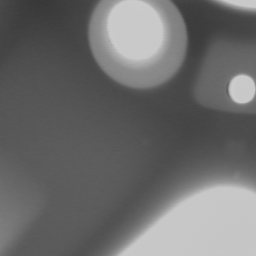

In [41]:
img

In [42]:
target

{'boxes': tensor([[219., 134., 252., 160.],
         [229., 169., 245., 185.],
         [135., 133., 151., 150.]]),
 'labels': tensor([1, 1, 1])}

In [35]:
prediction

[{'boxes': tensor([[228.4592, 167.7774, 245.3063, 184.9857],
          [136.2785, 133.0366, 154.3734, 151.1335],
          [218.5982, 134.8997, 250.7313, 159.4690],
          [223.8734, 133.4720, 255.2660, 173.0659],
          [132.3676, 133.1559, 159.9695, 157.9053]], device='cuda:0'),
  'labels': tensor([1, 1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.9772, 0.9736, 0.9654, 0.0669, 0.0549], device='cuda:0')}]

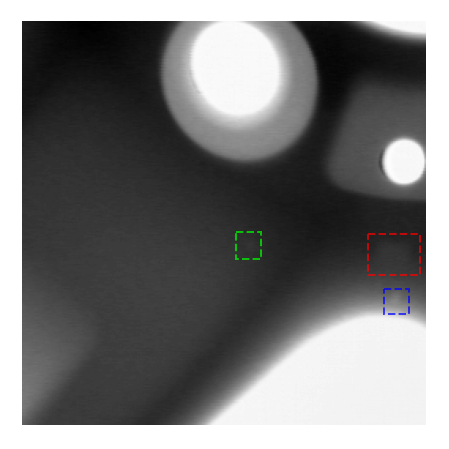

<AxesSubplot:>

In [44]:
visualize.display_instances(img, target['boxes'], figsize=(8, 8))

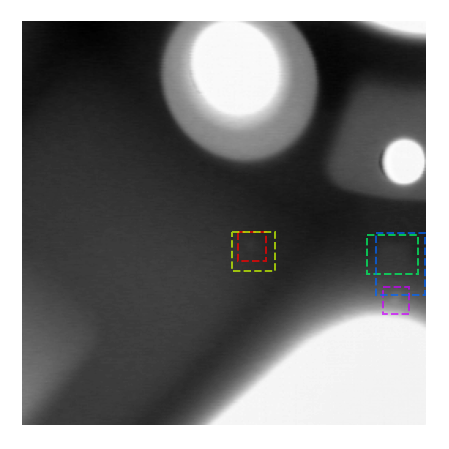

<AxesSubplot:>

In [36]:
visualize.display_instances(img, prediction[0]['boxes'].cpu(), figsize=(8, 8))